# Movies Analysis

by Hrushik Tadvai

This is the Notebook where I will demonstrate all my visualisations, coding and my machine learning models. The aim of this project is to identify key success factors which impact movies popularity and revenue. Please refer to my report for context regarding this project.

## Data Gathering

I will import two datasets saved on my personal desktop. You can find the datasets on the following website: https://www.kaggle.com/rounakbanik/the-movies-dataset. The metadata contains data on collections, genres, overview, dates, runtime etc. The credits dataset provides information on casting and directors.

In [1]:
pip install multiprocesspandas

     |████████████████████████████████| 126 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 9.0 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from multiprocesspandas import applyparallel

In [3]:
import pandas as pd
df = pd.read_csv("/Users/suhruth/Downloads/archive/movies_metadata.csv")
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [4]:
import pandas as pd
df2 = pd.read_csv("/Users/suhruth/Downloads/archive/credits.csv")
df2.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

## Data Cleaning

Before analysis it is crucial to sort the data into a usable form and deal with missing elements within the dataset. One of the first things I noticed was that most of the data was in object type which cannot be used in any calculations therefore i converted them into numeric types. Moreover, i chose to combine the two datasets to allow for easier investigation later on. Both sets had a unique ID column was was used as a pivot to merge the dataframes. 

In [5]:
df["budget"] = pd.to_numeric(df['budget'],errors='coerce')
df["popularity"] = pd.to_numeric(df['popularity'],errors='coerce')
df["id"] = pd.to_numeric(df['id'],errors='coerce')
df2['id'] = df2['id'].astype(float)
dfa = pd.merge(df, df2, on='id')

I then removed unnecessary columns which will not be used for any form of analysis.

In [6]:
del dfa['imdb_id']
del dfa['homepage']
del dfa['poster_path']
del dfa['tagline']

To initially consider the data for genres which is displayed in the earlier section, I created extra columns in the dataframe for each type of identified genres and used a simple binary representation to showcase if that genre is present in the movie or not with 1 being the case that the movie has that particular genre. This was done so that I could consider genre data in a later correlation analysis. As seen earlier the genre data very messy henceforth I used a str contains function to see if a particular genre was there and if present the corresponging genre column had one inputted.

In [7]:
dfa["B_Comedy"] = dfa['genres'].str.contains("Comedy").astype(int)
dfa["B_Animation"] = dfa['genres'].str.contains("Animation").astype(int)
dfa["B_Family"] = dfa['genres'].str.contains("Family").astype(int)
dfa["B_Adventure"] = dfa['genres'].str.contains("Adventure").astype(int)
dfa["B_Fantasy"] = dfa['genres'].str.contains("Fantasy").astype(int)
dfa["B_Romance"] = dfa['genres'].str.contains("Romance").astype(int)
dfa["B_Drama"] = dfa['genres'].str.contains("Drama").astype(int)
dfa["B_Action"] = dfa['genres'].str.contains("Action").astype(int)
dfa["Crime"] = dfa['genres'].str.contains("Crime").astype(int)
dfa["B_Thriller"] = dfa['genres'].str.contains("Thriller").astype(int)
dfa["B_Adventure"] = dfa['genres'].str.contains("Adventure").astype(int)
dfa["B_Horror"] = dfa['genres'].str.contains("Horror").astype(int)
dfa["B_History"] = dfa['genres'].str.contains("History").astype(int)
dfa["B_Science Fiction"] = dfa['genres'].str.contains("Science Fiction").astype(int)
dfa["B_Music"] = dfa['genres'].str.contains("Music").astype(int)
dfa["B_Documentary"] = dfa['genres'].str.contains("Documentary").astype(int)
dfa["B_Mystery"] = dfa['genres'].str.contains("Mystery").astype(int)
dfa["B_War"] = dfa['genres'].str.contains("War").astype(int)
dfa["B_Western"] = dfa['genres'].str.contains("Western").astype(int)
dfa["B_Foreign"] = dfa['genres'].str.contains("Foreign").astype(int)

In [8]:
dfa.isnull().sum()

adult                        0
belongs_to_collection    41038
budget                       0
genres                       0
id                           0
original_language           11
original_title               0
overview                   954
popularity                   3
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
title                        3
video                        3
vote_average                 3
vote_count                   3
cast                         0
crew                         0
B_Comedy                     0
B_Animation                  0
B_Family                     0
B_Adventure                  0
B_Fantasy                    0
B_Romance                    0
B_Drama                      0
B_Action                     0
Crime                        0
B_Thriller                   0
B_Horror

Above I summarised the missing elements for each column. For runtime I will be using the column median as a value for missing cells categorised by the binary genre data. I decided to use a median over mean to account for any potential outliers. I am also going to use a 'categorical' median for each cell where the median averages will by by the corresponding genre data to increase accuracy.

In [9]:
byclass = dfa.groupby(['B_Comedy', 'B_Animation','B_Family','B_Adventure','B_Fantasy','B_Romance','B_Drama','B_Action', 'Crime', 'B_Thriller',"B_Horror", "B_History", "B_Science Fiction", 'B_Music', "B_Documentary", "B_Mystery", 'B_War', "B_Western",'B_Foreign'])
def impute_median(series):
    return series.fillna(series.median())

In [10]:
dfa.runtime = byclass['runtime'].transform(impute_median)

To sort the string columns where it is filled with messy data like id and name I will be using a special program inspired by a similar study on Kaggle (https://www.kaggle.com/priteshm/eda-movies) who used it to sort collections data. I will be considering collections, genres, casting, production companies and production cuntries.

In [11]:
import ast
dfa['production_countries'] = dfa['production_countries'].fillna('[]').apply(ast.literal_eval)
change = lambda x: [i['name'] for i in x] if isinstance(x, list) else []
dfa['production_countries'] = dfa['production_countries'].apply(change)

In [12]:
dfa['cast'] = dfa['cast'].fillna('[]').apply(ast.literal_eval)
change = lambda x: [i['name'] for i in x] if isinstance(x, list) else []
dfa['cast'] = dfa['cast'].apply(change)

In [13]:
dfa['production_companies'] = dfa['production_companies'].fillna('[]').apply(ast.literal_eval)
change = lambda x: [i['name'] for i in x] if isinstance(x, list) else []
dfa['production_companies'] = dfa['production_companies'].apply(change)

In [14]:
dfa['genres'] = dfa['genres'].fillna('[]').apply(ast.literal_eval)
change = lambda x: [i['name'] for i in x] if isinstance(x, list) else []
dfa['genres'] = dfa['genres'].apply(change)

For initial collection data analysis i will be using a similar method of binary genres from earier for initial correlation analysis

In [15]:
dfa[['belongs_to_collection']] = dfa[['belongs_to_collection']].notnull().astype(int)
dfa.head()

adult  belongs_to_collection      budget                        genres  \
0  False                      1  30000000.0   [Animation, Comedy, Family]   
1  False                      0  65000000.0  [Adventure, Fantasy, Family]   
2  False                      1         0.0             [Romance, Comedy]   
3  False                      0  16000000.0      [Comedy, Drama, Romance]   
4  False                      1         0.0                      [Comedy]   

        id original_language               original_title  \
0    862.0                en                    Toy Story   
1   8844.0                en                      Jumanji   
2  15602.0                en             Grumpier Old Men   
3  31357.0                en            Waiting to Exhale   
4  11862.0                en  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                                production_companies  ... B_Thriller B_Horror  \
0                          [Pixar Animation Studios]  ...          0        0   
1  [TriStar Pictures, Teitler Film, Interscope Co...  ...          0        0   
2                     [Warner Bros., Lancaster Gate]  ...          0        0   
3           [Twentieth Century Fox Film Corporation]  ...          0        0   
4       [Sandollar Productions, Touchstone Pictures]  ...          0        0   

   B_History  B_Science Fiction B_Music B_Documentary B_Mystery B_War  \
0          0                  0       0             0         0     0   
1          0                  0       0             0         0     0   
2          0                  0       0             0         0     0   
3          0                  0       0             0         0     0   
4          0                  0       0             0         0     0   

   B_Western  B_Foreign  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 41 columns]

In [16]:
dfa.isnull().sum()

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
id                         0
original_language         11
original_title             0
overview                 954
popularity                 3
production_companies       0
production_countries       0
release_date              87
revenue                    3
runtime                    1
spoken_languages           3
status                    84
title                      3
video                      3
vote_average               3
vote_count                 3
cast                       0
crew                       0
B_Comedy                   0
B_Animation                0
B_Family                   0
B_Adventure                0
B_Fantasy                  0
B_Romance                  0
B_Drama                    0
B_Action                   0
Crime                      0
B_Thriller                 0
B_Horror                   0
B_History                  0
B_Science Fict

There are still some missing elements; the likes of release dates, overview and status cannot be estimated and the rest of the columns have very little missing elements. Therefore I can in good conscience delete rows where there are missing values. This is a very large dataset of over 45,000 rows of data so this will not be making an impact in terms of accuracy.

In [17]:
dfa = dfa.dropna(axis = 0)

## Analysis and Visualisation

### Correlation Analysis

My first thought was to identify any possible correlation links withing the variables which can be later explored upon. This is to identify any linear trends within the dataset.

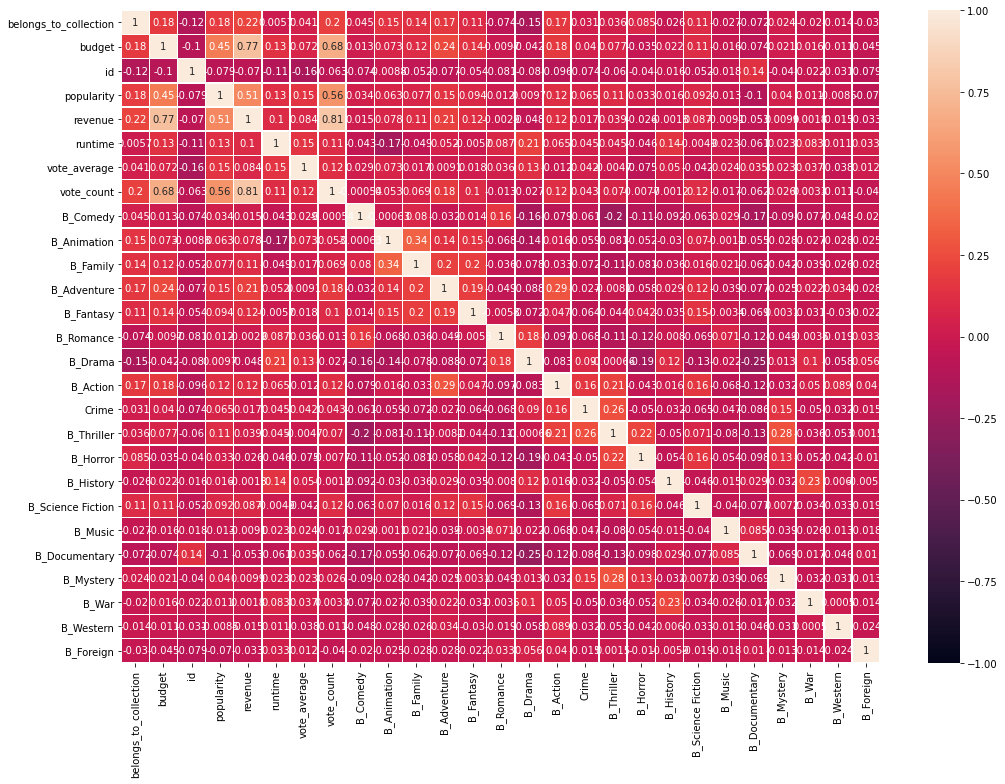

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 12))
sns.heatmap(dfa.corr(),annot=True,vmin=-1,vmax=1,linewidths=.5)

in regards to popularity there is surprisingly little correlation factors linked to popularity. It is clear that Budget influences popularity and there is a strong correlation link between popularity and revenue indicating that both behave similarly.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


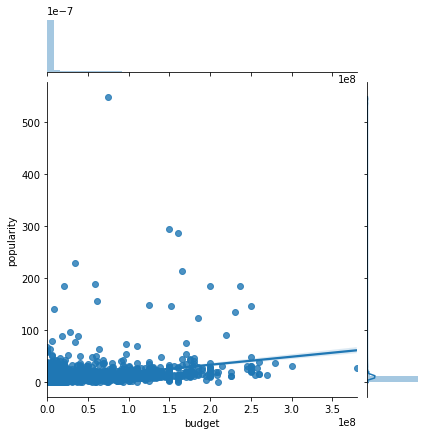

In [19]:
sns.jointplot(x="budget" ,y="popularity",data=dfa,kind="reg")

### Word Frequency Investigation

I wanted to identify the most frequent words used in the overview of the most popular movies to advise any marketing strategies regarding movies plot and advertising. I will be using a wordcloud to visualise this. I will first need to sort the data into descending order by popularity and select the top rows in terms of popularity. I then need to consider data like stop words, Repeated irrelevant words like ID and punctuations to sort the text data and visualise texts more suitable for this inquiry.

In [20]:
dfa = dfa.sort_values(by='popularity', ascending=False)
dfb = dfa.head(500)
dfb.head()

adult  belongs_to_collection       budget  \
30780  False                      1   74000000.0   
33439  False                      1  149000000.0   
42298  False                      0  160000000.0   
43719  False                      0   34000000.0   
24527  False                      0  165000000.0   

                                               genres        id  \
30780          [Family, Animation, Adventure, Comedy]  211672.0   
33439                    [Action, Adventure, Fantasy]  297762.0   
42298                      [Family, Fantasy, Romance]  321612.0   
43719                                 [Action, Crime]  339403.0   
24527  [Adventure, Family, Animation, Action, Comedy]  177572.0   

      original_language        original_title  \
30780                en               Minions   
33439                en          Wonder Woman   
42298                en  Beauty and the Beast   
43719                en           Baby Driver   
24527                en            Big Hero 6   

                                                overview  popularity  \
30780  Minions Stuart, Kevin and Bob are recruited by...  547.488298   
33439  An Amazon princess comes to the world of Man t...  294.337037   
42298  A live-action adaptation of Disney's version o...  287.253654   
43719  After being coerced into working for a crime b...  228.032744   
24527  The special bond that develops between plus-si...  213.849907   

                                    production_companies  ... B_Thriller  \
30780   [Universal Pictures, Illumination Entertainment]  ...          0   
33439  [Dune Entertainment, Atlas Entertainment, Warn...  ...          0   
42298           [Walt Disney Pictures, Mandeville Films]  ...          0   
43719  [Big Talk Productions, TriStar Pictures, Media...  ...          0   
24527  [Walt Disney Pictures, Walt Disney Animation S...  ...          0   

      B_Horror  B_History  B_Science Fiction B_Music B_Documentary B_Mystery  \
30780        0          0                  0       0             0         0   
33439        0          0                  0       0             0         0   
42298        0          0                  0       0             0         0   
43719        0          0                  0       0             0         0   
24527        0          0                  0       0             0         0   

      B_War  B_Western  B_Foreign  
30780     0          0          0  
33439     0          0          0  
42298     0          0          0  
43719     0          0          0  
24527     0          0          0  

[5 rows x 41 columns]

In [21]:
from nltk.corpus import stopwords
text = dfb['overview'].values
stop_words   = (stopwords.words('english'))
extra_words=['ID', "two","S" ]
filtered_book = [w for w in text if not w in stop_words]
filtered_book2 = [w for w in filtered_book if not w in extra_words]
punctuations = '''!()-,[]{};:’“”'"\,,<>./?@#$%^&*_~'''
filtered_book3 = [w for w in filtered_book2 if not w in punctuations]

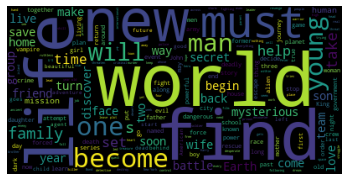

<Figure size 2880x2880 with 0 Axes>

In [22]:
from wordcloud import WordCloud
text = dfb['overview'].values 
wordcloud = WordCloud().generate(str(filtered_book3))

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(40,40))
plt.show()

There are a few interesting worlds in here like find, world and life which all indicate that movies within the adventure or similar categories are lifely to be popular. I believe that every initial promotional plot should contain some of these words for an increased probability of attracting an audience.

### Chronological Study

The purpose of this section of study is to analyse the change in movie industry over time and identify time periods of increased probability of profitability. The month visualisation and coding is again inspired by the Kaggle study(https://www.kaggle.com/priteshm/eda-movies) which i felt was too important to ignore.

In [23]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [24]:
dfa['month'] = dfa['release_date'].apply(get_month)
df_month = pd.pivot_table(dfa,
                              index = 'month',
                              values='revenue',
                              aggfunc={'revenue':['count','mean']}).reset_index()

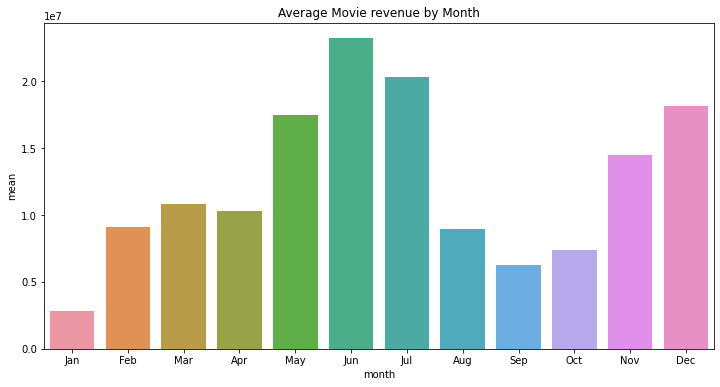

In [25]:
plt.figure(figsize=(12,6))
plt.title("Average Movie revenue by Month")
sns.barplot(x='month', y='mean', data=df_month, order=month_order)

There are two clear time periods during summer and christmas where there is an increase in average revenue.

To consider a timeseries data i first need to sort the date data into a usable format Y then visualied thts information as an iplot to show the change in trends.

In [26]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
date = []

for i in dfa[~dfa.release_date.isna()]['release_date']:
    try:
        date.append(pd.to_datetime(i, format='%Y-%m-%d').year)
    except:
        pass
year = pd.Series(date).value_counts().sort_index()
trace = go.Scatter(x = year.index, y = year.values)
layout = dict(title = 'Number of Movies over the years'.format(year.shape[0]),
              xaxis = dict(title = 'Movie Release Year'),
              yaxis = dict(title = 'Count of Movies'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

There is a constant inrease in the number of movies. This dataet only follows till 2017 so after that the count goes to zero. From the 1980s the count od movies has almost risen exponentially. To consider revenue i need to create a new dataframe with existing data.

In [27]:
for i in dfa[~dfa.release_date.isna()]['release_date']:
    try:
        dfa["release_date"].append(pd.to_datetime(i, format='%Y-%m-%d').year)
    except:
        pass
dfa["release_date"]

30780    2015-06-17
33439    2017-05-30
42298    2017-03-16
43719    2017-06-28
24527    2014-10-24
            ...    
18417    1989-03-25
40207    1977-10-11
20841    1970-11-27
43501    1978-02-04
30750    1989-09-17
Name: release_date, Length: 44436, dtype: object

In [28]:
df_dates = pd.pivot_table(dfa,
                              index = 'release_date',
                              values='revenue',
                              aggfunc={'revenue':['mean']}).reset_index()

In [29]:
trace = go.Scatter(x = df_dates["release_date"], y = df_dates["mean"])
layout = dict(title = 'Movies over the years by revenue'.format(year.shape[0]),
              xaxis = dict(title = 'Movie Release Year'),
              yaxis = dict(title = 'Average revenue of Movies'))

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Genre Analysis

I will be creating a new dataframe with genre and popularity data and visualise these in a boxenplot to showcase the distributions within each of the invervals.

In [30]:
q = dfb.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
q.name = 'genre'
genre_df = dfa.drop('genres', axis=1).join(q)
genre_df["popularity"] = pd.to_numeric(genre_df['popularity'],errors='coerce')

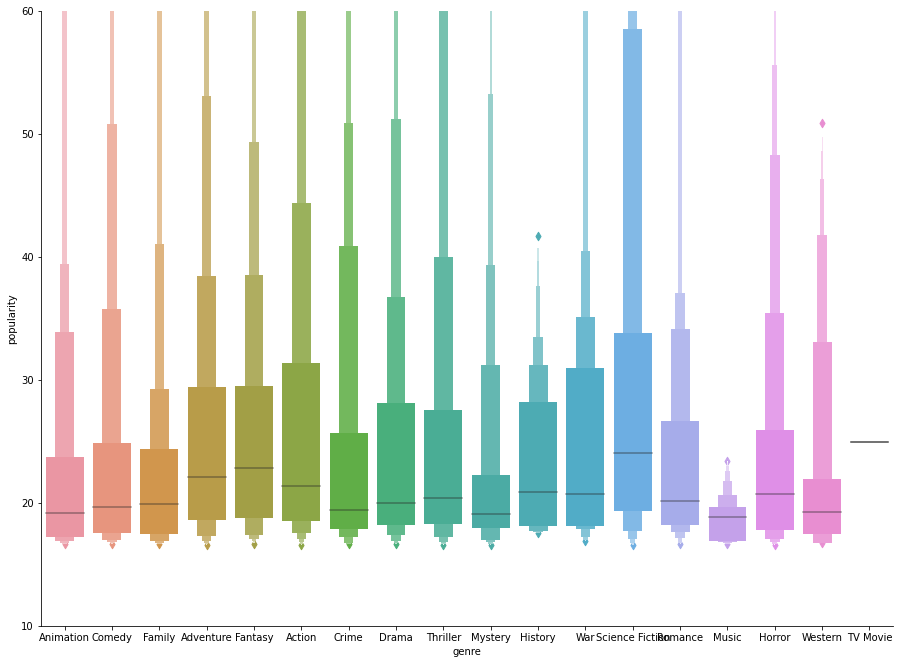

In [31]:
g=sns.catplot(x='genre', y='popularity', data=genre_df, kind = "boxen")
g.fig.set_size_inches(15,10)
g.set(ylim=(10, 60))

Adventure, Fantasy and Science fiction appear to have a greater mean and upperquartile for popularity indicating that these genres are likely to yield more success in the Box Office.

### Geographical differences in movie revenue

This section will be about how revenue differs across countries. After gathering the relevant data into a pandas dataframe I will be using plotly which is an amazing tool for visualisation (https://plotly.com/python/choropleth-maps/) and is simple to use.

In [32]:
df_countries1 = df["revenue"]
df_countries2 = pd.DataFrame(df_countries1)
df_countries2["countries"] = dfa["production_countries"]


In [33]:
x = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
x.name = 'countries'

In [34]:
df_countries2['countries'] = df_countries2['countries'].astype('str')
df_countries2.applymap(lambda x: x if not isinstance(x, list) else x[0] if len(x) else '')
df_countries2

revenue                     countries
0      373554033.0  ['United States of America']
1      262797249.0  ['United States of America']
2              0.0  ['United States of America']
3       81452156.0  ['United States of America']
4       76578911.0  ['United States of America']
...            ...                           ...
45461          0.0    ['Germany', 'Switzerland']
45462          0.0  ['United States of America']
45463          0.0                            []
45464          0.0  ['United States of America']
45465          0.0           ['Italy', 'France']

[45466 rows x 2 columns]

In [35]:
q = dfa.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
q.name = 'production_countries'
country_df = dfa.drop('production_countries', axis=1).join(q)
country_df["popularity"] = pd.to_numeric(country_df['popularity'],errors='coerce')

<ipython-input-35-89926a17cb03>:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [36]:
df_countries1 = country_df["revenue"]
df_countries2 = pd.DataFrame(df_countries1)
df_countries2["countries"] = country_df["production_countries"]

In [37]:
df_countries3 = df_countries2.groupby(['countries'],)['revenue'].agg(lambda x: x.unique().mean()).reset_index()


In [38]:
data = dict(type = 'choropleth',
           locations = df_countries3['countries'],zmin=0, zmax=100000000,
           colorscale = 'Rainbow',
           locationmode = 'country names',
           z = df_countries3['revenue'],
           text = df_countries3['countries'],
           colorbar = {'title' : 'countries by movie revenue'})

layout = dict(title = 'Countries where movies are directed',
             geo = dict(showframe= False,
                       projection = {'type' : 'mercator'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)

Countries in Anglosphere and china appear to have movies that produce great revenue on average

### Collections

I want to see if movies within a collection of movies like Marvel are morely likely to be polular than those not in a collection. The mean averages below inicate that the statement is indeed true. I then constructed a new dataframe with the collections and their mean values to visualise into a graph. I also wanted to compare if making more movies in the same collection is likely to reap high rewards hence I considered the size of each collection as count.

In [39]:
df_collection1 = dfa[dfa.belongs_to_collection == 1]
df_collection2 = dfa[dfa.belongs_to_collection == 0]
print(df_collection1["popularity"].mean())
print(df_collection2["popularity"].mean())

6.308259498309659
2.6121111320283363


Movies in a collection are more popular tham movies not. Possible reason why hollywood produces many prequel and sequels.

In [40]:
import numpy as np
df_collectiona = df[df['belongs_to_collection'].notnull()]
df_collectiona['belongs_to_collection'] = df_collectiona['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

<ipython-input-40-c796f2f7e848>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
df_collectionb = df_collectiona[df_collectiona['belongs_to_collection'].notnull()]

In [42]:
df_collectionc = pd.pivot_table(df_collectionb,
                              index = 'belongs_to_collection',
                              values='revenue',
                              aggfunc={'revenue':['count','mean']}).reset_index()

In [43]:
s = df_collectionc.sort_values('mean', ascending=False)

In [44]:
import plotly.express as px
fig = px.scatter(s.head(50), x="count", y="mean",size="mean", color="belongs_to_collection",
                 hover_name="count", log_x=True, size_max=60)
fig.show()

### Casting

This section is to purely identify which actors and actress consistently act in blockbuster movies with large revenue. The approach will be similar to the above section. Because there are more elements within the list, I created a new pandas dataframe consisting of the split lists in the cast column where each actor is in its own column. This is so that it becomes easier to select a number of these cast for later analysis. The cast data is already listed by lead roles listed first so i will consider the first 5 columns. 

In [45]:
dfn = pd.DataFrame(dfa['cast'].to_list(), index= dfa.index)

In [46]:
dfn["revenue"] = dfa["revenue"]

In [47]:
dfn.rename(columns={ dfn.columns[0]: "actor0" }, inplace = True)
dfn.rename(columns={ dfn.columns[1]: "actor1" }, inplace = True)
dfn.rename(columns={ dfn.columns[2]: "actor2" }, inplace = True)
dfn.rename(columns={ dfn.columns[3]: "actor3" }, inplace = True)
dfn.rename(columns={ dfn.columns[4]: "actor4" }, inplace = True)
dfn.rename(columns={ dfn.columns[5]: "actor5" }, inplace = True)

In [48]:
actor_list = pd.melt(dfn, id_vars=['revenue'], value_vars=["actor0","actor1","actor2","actor3","actor4","actor5"],
                    var_name='variable', value_name='actor_name')
actor_list.head()

revenue variable      actor_name
0  1.156731e+09   actor0  Sandra Bullock
1  8.205804e+08   actor0       Gal Gadot
2  1.262886e+09   actor0     Emma Watson
3  2.245113e+08   actor0    Ansel Elgort
4  6.521054e+08   actor0     Scott Adsit

In [49]:
df_actorg = pd.pivot_table(actor_list,
                              index = 'actor_name',
                              values='revenue',
                              aggfunc={'revenue':['count','mean']}).reset_index()

In [50]:
j = df_actorg.sort_values('mean', ascending=False)
import plotly.express as px
fig = px.scatter(j.head(50), x="count", y="mean",size="mean", color="actor_name",
                 hover_name="count", log_x=True, size_max=60)
fig.show()

### Production Companies

I want to identify if there are clear market leaders in this inudtry and if they make large revenue for each movie on a consistent basis. I will be using the same steps as in section above.

In [51]:
dfv = pd.DataFrame(dfa['production_companies'].to_list(), index= dfa.index)
dfv["revenue"] = dfa["revenue"]

In [52]:
dfv.rename(columns={ dfv.columns[0]: "com0" }, inplace = True)
dfv.rename(columns={ dfv.columns[1]: "com1" }, inplace = True)
dfv.rename(columns={ dfv.columns[2]: "com2" }, inplace = True)
dfv.rename(columns={ dfv.columns[3]: "com3" }, inplace = True)
dfv.rename(columns={ dfv.columns[4]: "com4" }, inplace = True)
dfv.rename(columns={ dfv.columns[5]: "com5" }, inplace = True)

In [53]:
com_list = pd.melt(dfv, id_vars=['revenue'], value_vars=["com0","com1","com2","com3","com4","com5"],
                    var_name='variable', value_name='com_name')
com_list.head()

revenue variable              com_name
0  1.156731e+09     com0    Universal Pictures
1  8.205804e+08     com0    Dune Entertainment
2  1.262886e+09     com0  Walt Disney Pictures
3  2.245113e+08     com0  Big Talk Productions
4  6.521054e+08     com0  Walt Disney Pictures

In [54]:
df_comp = pd.pivot_table(com_list,
                              index = 'com_name',
                              values='revenue',
                              aggfunc={'revenue':['count','mean']}).reset_index()

In [55]:
g = df_comp.sort_values('count', ascending=False)

In [56]:
import plotly.express as px
fig = px.scatter(g.head(100), x="count", y="mean",size="mean", color="com_name",
                 hover_name="count", log_x=True, size_max=60)
fig.show()

## Machine Learning modelling

I wanted to consider as many variables as possible to make my models accurate. This lead me to consider text data within these models. To do this i needed to turn text data into numeric arrays for later analysis. Inspiration for this method came from https://towardsdatascience.com/how-to-vectorize-text-in-dataframes-for-nlp-tasks-3-simple-techniques-82925a5600db. I chose to use a pre trained model in tensorflow to vectorize the string columns into numpy arrays. I also want to compare differences between a regressor model and a classifier model so i will be constructing one model for both categories.

In [57]:
!pip install --upgrade tensorflow_hub
import tensorflow_hub as hub
#download the model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

Requirement already up-to-date: tensorflow_hub in /opt/anaconda3/lib/python3.8/site-packages (0.12.0)


In [58]:
dfh = dfa.sample(500)

In [59]:
import numpy as np
embeddings = embed(dfh['overview'])
use= np.array(embeddings).tolist()
dfh['E_overview'] = use
dfh.head(5)

adult  belongs_to_collection      budget  \
31473  False                      0         0.0   
13298  False                      0   4000000.0   
2465   False                      0  14000000.0   
9562   False                      0  17500000.0   
10196  False                      0         0.0   

                                 genres        id original_language  \
31473         [Horror, Science Fiction]  113525.0                en   
13298  [Comedy, Crime, Drama, Thriller]   15676.0                en   
2465                   [Drama, Romance]   28029.0                en   
9562              [Drama, History, War]     205.0                en   
10196                    [Crime, Drama]   26323.0                en   

           original_title                                           overview  \
31473              Embryo  A scientist doing experiments on a human fetus...   
13298           Nobel Son  Soon after his insufferably arrogant father wi...   
2465   A Walk on the Moon  The world of a young housewife is turned upsid...   
9562         Hotel Rwanda  Inspired by true events, this film takes place...   
10196          Bordertown  An ambitious Mexican-American gets mixed up wi...   

       popularity                               production_companies  ...  \
31473    3.949663  [Sandy Howard Productions, Plura Service Company]  ...   
13298    2.420823                                 [Gimme Five Films]  ...   
2465     7.703645  [Miramax Films, Village Roadshow Pictures, Gro...  ...   
9562    10.262332  [Lions Gate Films, United Artists, Industrial ...  ...   
10196    1.588639                                     [Warner Bros.]  ...   

      B_History B_Science Fiction  B_Music  B_Documentary B_Mystery B_War  \
31473         0                 1        0              0         0     0   
13298         0                 0        0              0         0     0   
2465          0                 0        0              0         0     0   
9562          1                 0        0              0         0     1   
10196         0                 0        0              0         0     0   

      B_Western B_Foreign  month  \
31473         0         0    May   
13298         0         0    Apr   
2465          0         0    Jan   
9562          0         0    Sep   
10196         0         0    Jan   

                                              E_overview  
31473  [0.004997088108211756, -0.002556959167122841, ...  
13298  [0.009604515507817268, 0.04940875619649887, 0....  
2465   [0.044355642050504684, -0.08885165303945541, 0...  
9562   [-0.021229973062872887, 0.0026446206029504538,...  
10196  [0.0233000498265028, -0.02759513258934021, -0....  

[5 rows x 43 columns]

In [60]:
dfh["genres"] = dfh.genres.apply_parallel(lambda x: ', '.join([str(i) for i in x]))
dfh["production_companies"] = dfh.production_companies.apply_parallel(lambda x: ', '.join([str(i) for i in x]))
dfh["cast"] = dfh.cast.apply_parallel(lambda x: ', '.join([str(i) for i in x]))

In [61]:
import numpy as np
embeddings = embed(dfh['genres'])
use= np.array(embeddings).tolist()
dfh['E_genres'] = use


In [62]:
import numpy as np
embeddings = embed(dfh['production_companies'])
use= np.array(embeddings).tolist()
dfh['E_productioncomp'] = use

In [63]:
import numpy as np
embeddings = embed(dfh['cast'])
use= np.array(embeddings).tolist()
dfh['E_cast'] = use

I then decided that the arrays are much too large for analysis therefore i had to consider to dimensionally reduce text. This was done using the texthero package. I then split the 2 dimensional arrays into their own columns.

In [64]:
import texthero as hero
dfh['Et_cast'] = hero.tsne(dfh['E_cast'])
dfh['Et_genres'] = hero.tsne(dfh['E_genres'])
dfh['Et_overview'] = hero.tsne(dfh['E_overview'])
dfh['Et_productioncomp'] = hero.tsne(dfh['E_productioncomp'])

In [65]:
df1 = pd.DataFrame(dfh['Et_cast'].to_list(), index= dfh.index)
df2 = pd.DataFrame(dfh['Et_overview'].to_list(), index= dfh.index)
df3 = pd.DataFrame(dfh['Et_genres'].to_list(), index= dfh.index)
df4 = pd.DataFrame(dfh['Et_productioncomp'].to_list(), index= dfh.index)
df1["2"] = df2[0]
df1["3"] = df2[1]
df1["4"] = df3[0]
df1["5"] = df3[1]
df1["6"] = df4[0]
df1["7"] = df4[1]
df1["runtime"] = dfh["runtime"]
df1["budget"] = dfh["budget"]
df1["popularity"] = dfh["popularity"]
df1

0          1          2          3          4          5  \
31473   5.204151  -5.450456   6.744203   1.416745   8.280510   7.011565   
13298   6.860403  -3.751932   2.242574 -13.898087   1.582959  15.706752   
2465    4.154765  -4.398688   9.274965   4.367959 -11.519053  -4.452958   
9562    2.014370  -5.507696 -12.479049  -0.290943 -10.198895   5.988768   
10196   1.646317   7.224723   8.476687  -3.367594  -0.929118  19.871109   
...          ...        ...        ...        ...        ...        ...   
15920 -18.012964  13.823606  -5.894354   6.899947 -16.128414   3.035291   
43714  -7.099635  -4.589047  -4.575964 -11.377215   0.427018   3.631830   
33682 -15.893059  12.715314   7.686347  -8.438542  -1.681311  19.784067   
33443   1.637661 -13.661304  19.260443  -4.779949   9.788142  15.058607   
27405  -6.398626   3.557504  -0.424599  -3.742028   9.741753  10.751949   

               6          7  runtime      budget  popularity  
31473  -3.053955   0.723556    104.0         0.0    3.949663  
13298   4.940618 -15.754681    110.0   4000000.0    2.420823  
2465    4.404278  -4.738222    107.0  14000000.0    7.703645  
9562    6.272194  -2.496829    121.0  17500000.0   10.262332  
10196  -6.335039  -0.938695     90.0         0.0    1.588639  
...          ...        ...      ...         ...         ...  
15920  -3.644607  -4.247270     80.0         0.0    0.392813  
43714 -16.332300  22.672058     87.0     10000.0    0.049443  
33682   3.624615  -6.194108     98.0         0.0    0.837460  
33443   9.623702  -0.950098     98.0         0.0    2.264631  
27405  -2.156803  -5.129309    111.0   1000000.0    0.819990  

[500 rows x 11 columns]

In [66]:
df1.rename(columns={ df1.columns[0]: "0" }, inplace = True)
df1.rename(columns={ df1.columns[1]: "1" }, inplace = True)

### Create Training and Test Sets

I employed the use of Sklearns splitting function to create training and testing datasets for analysis. One of the first things I noticed that with my dataset is that there are a few negative values. This means that i am limited in the models that I consider.

In [67]:
from sklearn.model_selection import train_test_split
y = df1["popularity"]
X = df1.filter(['budget','runtime',"1","2",'3','4','5','6','7','0'], axis=1)
#X = df1
y=y.astype('int')
X=X.astype('int')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Linear regression

I chose to do a linear regression model first as there was evidence from my earlier correlation matrix that there were some variables that had potential linear correlation links. I then used an accuracy score test and R^2 test to calculate the potential accuracy of this model. The accuracy tests for this models were low.

In [68]:
from sklearn import linear_model
from sklearn import datasets

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [69]:
Y_pred_test = model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.round(), Y_pred_test.round())

0.15

In [71]:
from sklearn.metrics import r2_score
score = r2_score(y_test, Y_pred_test)
score # decnt, weak

-0.049707865738761514

### KNN

I wanted to explore if classification models yield a higher accuarcy score than that of a regressor model. KNN works by seperating the data into classes and then use the predictor function to predict the classification of the new sample point. This is likely to be a more successful model.

In [72]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
Y_pred_test = neigh.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.round(), Y_pred_test.round())

0.39

In [75]:
from sklearn.metrics import r2_score
score = r2_score(y_test, Y_pred_test)
score

0.2441834991017835

Clearly KNN is the better predictor. I then wished to explore the effects each menthod of dimensional reduce would have on the accuracy of the KNN model. I used examples from the scikit learn website to contruct this (inspiration: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

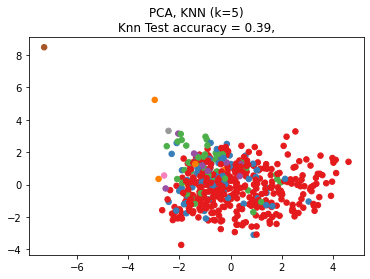

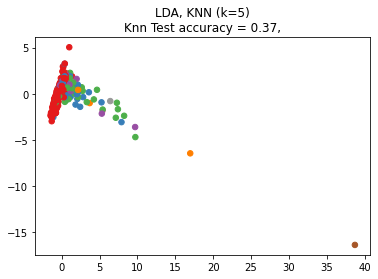

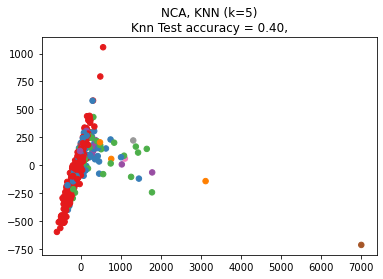

In [77]:
n_neighbors = 5
random_state = 0
dim = 10
n_classes = len(np.unique(y))

pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]


for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    model.fit(X_train, y_train)

    knn.fit(model.transform(X_train), y_train)

    acc_knn = knn.score(model.transform(X_test), y_test)

    X_embedded = model.transform(X)

    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nKnn Test accuracy = {:.2f},".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()
                              

A smaller dataset of 500 had to be used for training models due to the length of time taken to run the word vectorization code. This is a major limitation.

In [78]:
# use multiprocess pandas and explain it check
# add neural net classifier
# do some webscraping